<a href="https://colab.research.google.com/github/RyanBenkeser/kobebryant/blob/master/KobeBryant_Shots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
kobe = pd.read_csv('kobebryantdata.csv')

In [318]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,0,1996-97,42,18,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/3/96,LAL vs. MIN,MIN,22902
1,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,0,1996-97,8,16,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/5/96,LAL @ NYK,NYK,22903
2,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,0,1996-97,37,23,1.0,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22904
3,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,0,1996-97,34,0,0.0,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22905
4,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,0,1996-97,27,13,1.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22906


In [0]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [320]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61394 entries, 0 to 61393
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         61394 non-null  object 
 1   combined_shot_type  61394 non-null  object 
 2   game_event_id       61394 non-null  int64  
 3   game_id             61394 non-null  int64  
 4   lat                 61394 non-null  float64
 5   loc_x               61394 non-null  int64  
 6   loc_y               61394 non-null  int64  
 7   lon                 61394 non-null  float64
 8   minutes_remaining   61394 non-null  int64  
 9   period              61394 non-null  int64  
 10  playoffs            61394 non-null  int64  
 11  season              61394 non-null  object 
 12  seconds_remaining   61394 non-null  int64  
 13  shot_distance       61394 non-null  int64  
 14  shot_made_flag      51394 non-null  float64
 15  shot_type           61394 non-null  object 
 16  shot

In [321]:
kobe.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,61394.00000,6.139400e+04,61394.000000,61394.000000,61394.000000,61394.000000,61394.000000,61394.000000,61394.000000,61394.000000,61394.000000,51394.000000,6.139400e+04,61394.000000
mean,249.19080,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.00249,7.755112e+06,0.087791,110.123681,87.790646,0.110124,3.449869,1.153656,0.353671,17.478807,9.374113,0.497098,0.000000e+00,8861.532772
min,2.00000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.00000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.00000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.00000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.00000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [322]:
kobe.isnull().values.any()

True

In [323]:
kobe['shot_made_flag'].isnull().sum()

10000

In [0]:
#Will get rid of the 5000 free throws attempted in his career
cleankobe= kobe.dropna(subset=['shot_made_flag'])

In [325]:
cleankobe.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,51394.000000,5.139400e+04,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,5.139400e+04,51394.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.777062,7.738033e+06,0.088151,110.072076,88.151249,0.110072,3.452442,1.151615,0.353353,17.523221,9.388633,0.497098,0.000000e+00,8860.376194
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [0]:
cleankobe.insert(len(cleankobe.columns), 'time_remaining',
                 pd.Series(cleankobe.minutes_remaining*60+cleankobe.seconds_remaining))

In [327]:
print(cleankobe.info)

<bound method DataFrame.info of                     action_type combined_shot_type  ...  shot_id  time_remaining
0                     Jump Shot          Jump Shot  ...    22902              42
1                     Jump Shot          Jump Shot  ...    22903             608
2                     Jump Shot          Jump Shot  ...    22904             517
3                     Jump Shot          Jump Shot  ...    22905             394
4                     Jump Shot          Jump Shot  ...    22906             327
...                         ...                ...  ...      ...             ...
61387  Turnaround Fadeaway shot          Jump Shot  ...    22895             267
61388                Layup Shot              Layup  ...    22896             232
61389        Reverse Layup Shot              Layup  ...    22897             185
61390        Driving Layup Shot              Layup  ...    22898             105
61392          Pullup Jump shot          Jump Shot  ...    22900             

In [328]:
import pandas as pd
cleankobe.head()
#sort shots by game date in chronological order

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining
0,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,0,1996-97,42,18,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/3/96,LAL vs. MIN,MIN,22902,42
1,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,0,1996-97,8,16,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/5/96,LAL @ NYK,NYK,22903,608
2,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,0,1996-97,37,23,1.0,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22904,517
3,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,0,1996-97,34,0,0.0,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22905,394
4,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,0,1996-97,27,13,1.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22906,327


(-85.75, 832.75, -274.9, 272.9)

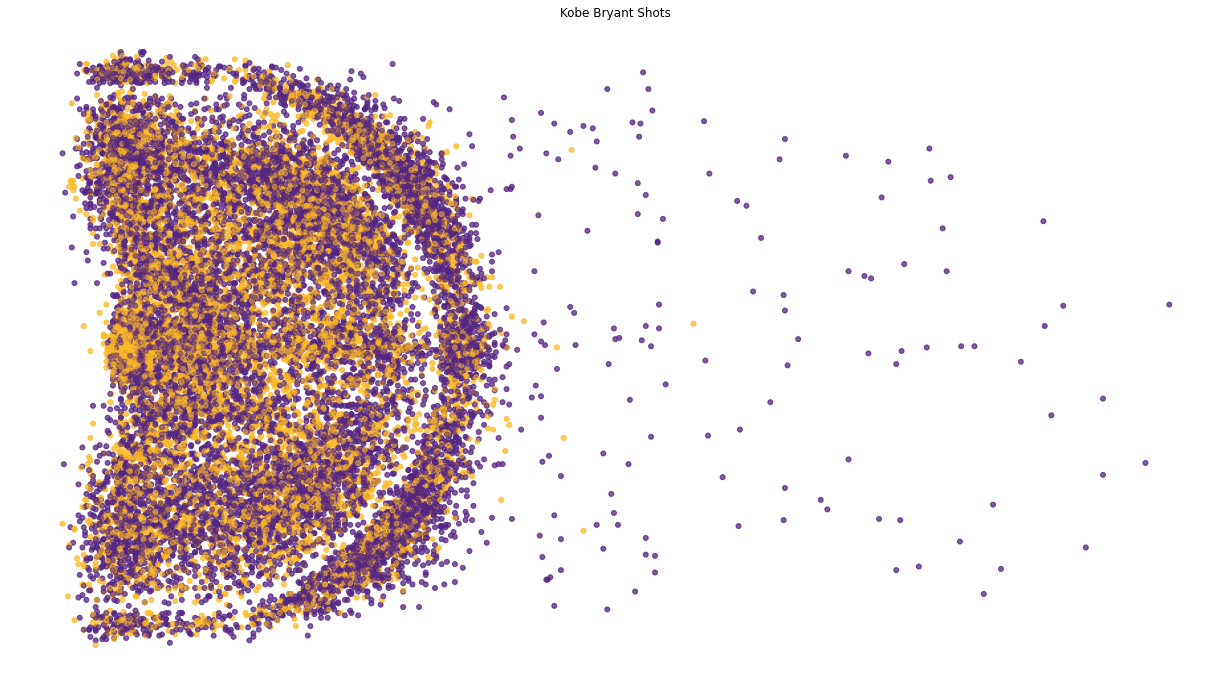

In [383]:
import numpy as np

colors = np.where(cleankobe['shot_made_flag']==1, "#FDB927", "#552583");

plt.figure(figsize=(48,12))
plt.subplot(121)
plt.title('Kobe Bryant Shots')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.scatter(cleankobe.loc_y, cleankobe.loc_x, s=24, color=colors, alpha=0.5)
plt.axis('off')

In [330]:
colorsIdx = {0: 'rgb(85,37,130)', 1: 'rgb(253,185,39)'}
cols = cleankobe['shot_made_flag'].map(colorsIdx)
print(cols)

0         rgb(85,37,130)
1         rgb(85,37,130)
2        rgb(253,185,39)
3         rgb(85,37,130)
4        rgb(253,185,39)
              ...       
61387     rgb(85,37,130)
61388     rgb(85,37,130)
61389    rgb(253,185,39)
61390    rgb(253,185,39)
61392    rgb(253,185,39)
Name: shot_made_flag, Length: 51394, dtype: object


In [331]:
colorsIdx = {0: 'Missed', 1: 'Made'}
cols = cleankobe['shot_made_flag'].map(colorsIdx)
cols


0        Missed
1        Missed
2          Made
3        Missed
4          Made
          ...  
61387    Missed
61388    Missed
61389      Made
61390      Made
61392      Made
Name: shot_made_flag, Length: 51394, dtype: object

In [332]:
#duplicate the data so that the visualization ends with entire career
careerkobe['season']='Career'
careerkobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining,Season
22901,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,0,Career,42,18,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/3/96,LAL vs. MIN,MIN,22902,42,Career
22902,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,0,Career,8,16,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/5/96,LAL @ NYK,NYK,22903,608,Career
22903,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,0,Career,37,23,1.0,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22904,517,Career
22905,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,0,Career,27,13,1.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22906,327,Career
22904,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,0,Career,34,0,0.0,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/6/96,LAL @ CHH,CHA,22905,394,Career
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22889,Pullup Jump shot,Jump Shot,403,21501228,33.8073,43,237,-118.2268,8,4,0,Career,58,24,1.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,4/13/16,LAL vs. UTA,UTA,22890,538,Career
22879,Driving Layup Shot,Layup,305,21501228,34.0413,15,3,-118.2548,5,3,0,Career,36,1,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,4/13/16,LAL vs. UTA,UTA,22880,336,Career
22881,Jump Shot,Jump Shot,324,21501228,34.0183,228,26,-118.0418,4,3,0,Career,12,22,1.0,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,1610612747,Los Angeles Lakers,4/13/16,LAL vs. UTA,UTA,22882,252,Career
22885,Jump Shot,Jump Shot,380,21501228,34.0543,-237,-10,-118.5068,11,4,0,Career,18,23,0.0,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,1610612747,Los Angeles Lakers,4/13/16,LAL vs. UTA,UTA,22886,678,Career


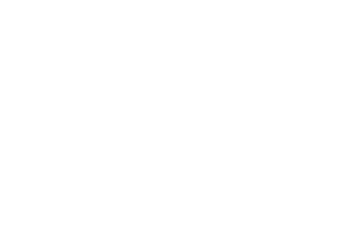

In [374]:
import pandas as pd     #(version 1.0.0)
import plotly           #(version 4.5.0)
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go


color_discrete_map={'Missed': 'rgb(85,37,130)', 'Made': 'rgb(253,185,39)'}

# Build the dot plot (variation of scatter plot)
fig = px.scatter(cleankobe, x="loc_y", y="loc_x", animation_frame="season", 
                 color=cols,title="Kobe Shots by Season", width = 1200, height = 800, 
                 color_discrete_map=color_discrete_map, opacity=1
      )


# print(fig.layout)
# print(fig.data)
# print(fig.frames)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] =0
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='rgb(255,255,255)', showlegend=True)
fig.update_xaxes(showgrid=False, zeroline=False,ticks='',showticklabels=False, title=None)
fig.update_yaxes(showgrid=False, zeroline=False,ticks='',showticklabels=False,title=None)
plt.axis('off')

pio.show(fig)